# Class weight balancing

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Import Keras libraries
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.optimizers import SGD
from keras.layers import Dense, Dropout,BatchNormalization
from keras import backend as K
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical


from sklearn.utils import class_weight


In [11]:
# Read customer satisfaction dataset

dataset = pd.read_csv('./customersatisfaction.csv')
dataset.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [6]:
# Remove the ID column

dataset.drop('ID',axis=1,inplace=True)

# Split features and targets

y = dataset.TARGET.values
X = dataset.drop('TARGET',axis=1)

# Create training set and test set (1000 samples)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 10000, random_state =0)

# Data normalization

scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

/home/wouter/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/wouter/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:19: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/wouter/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


In [7]:
# Neural network

y_train_one_hot = np_utils.to_categorical(y_train)

batch_size = 32
epochs = 5

input_dim = X_train.shape[1]

model = Sequential()
model.add(Dense(5, input_dim=input_dim, kernel_initializer="RandomUniform",activation="relu"))
model.add(Dense(5, kernel_initializer="RandomUniform",activation='relu'))
model.add(Dense(5, kernel_initializer="RandomUniform",activation='relu'))
model.add(Dense(2))
model.add(Activation('softmax'))

adam = keras.optimizers.Adam()

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=adam)

history = model.fit(X_train, y_train_one_hot, validation_split=0.2, epochs=epochs, verbose=1)

Train on 52816 samples, validate on 13204 samples
Epoch 1/5
52816/52816 [==============================] - 7s 139us/step - loss: 0.1754 - val_loss: 0.1495
Epoch 2/5
52816/52816 [==============================] - 7s 132us/step - loss: 0.1440 - val_loss: 0.1439
Epoch 3/5
52816/52816 [==============================] - 7s 135us/step - loss: 0.1406 - val_loss: 0.1430
Epoch 4/5
52816/52816 [==============================] - 7s 136us/step - loss: 0.1391 - val_loss: 0.1419
Epoch 5/5
52816/52816 [==============================] - 7s 130us/step - loss: 0.1379 - val_loss: 0.1413


In [8]:
# Testing

y_pred = model.predict_classes(X_test)
print('\n')
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)

print(cf)
print(accuracy_score(y_test, y_pred) * 100) 



              precision    recall  f1-score   support

           0       0.96      1.00      0.98      9572
           1       0.00      0.00      0.00       428

   micro avg       0.96      0.96      0.96     10000
   macro avg       0.48      0.50      0.49     10000
weighted avg       0.92      0.96      0.94     10000

[[9572    0]
 [ 428    0]]
95.72


/home/wouter/tensorflow/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


count klasse 0:  73012
count klasse 1:  3008
ratio:  24.272606382978722


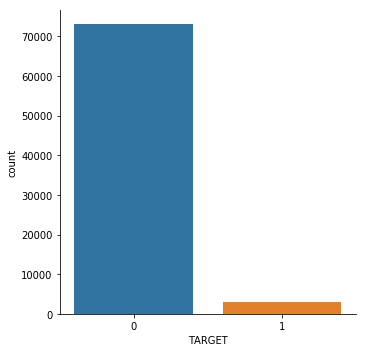

In [36]:
# balancedness of the dataset
label_count = np.bincount(y)

print('count klasse 0: ',label_count[0])
print('count klasse 1: ',label_count[1])

print('ratio: ',label_count[0]/label_count[1])


sns.catplot(x='TARGET',kind='count', data=dataset)


In [ ]:
# Train a neural network with balanced class weights 

y_train_one_hot = np_utils.to_categorical(y_train)

batch_size = 16
epochs = 15

input_dim = X_train.shape[1]

model = Sequential()
model.add(Dense(5, input_dim=input_dim, kernel_initializer="RandomUniform",activation="relu"))
model.add(Dense(5, kernel_initializer="RandomUniform",activation='relu'))
model.add(Dense(5, kernel_initializer="RandomUniform",activation='relu'))
model.add(Dense(2))
model.add(Activation('softmax'))

adam = keras.optimizers.Adam()

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=adam)

class_weights = class_weight.compute_class_weight('balanced',np.unique(y_train),y_train)
print(class_weights)
class_weights= dict(enumerate(class_weights))


#history = model.fit(X_train, y_train_one_hot, validation_split=0.2, epochs=epochs, verbose=1,class_weight=class_weights)
history = model.fit(X_train, y_train_one_hot, validation_split=0.2, epochs=epochs, verbose=1,class_weight={0:1,1:10})

[ 0.52033417 12.79457364]
Train on 52816 samples, validate on 13204 samples
Epoch 1/15
52816/52816 [==============================] - 6s 121us/step - loss: 0.7137 - val_loss: 0.6722
Epoch 2/15
52816/52816 [==============================] - 7s 140us/step - loss: 0.6554 - val_loss: 0.6577
Epoch 3/15
52816/52816 [==============================] - 8s 147us/step - loss: 0.6444 - val_loss: 0.6558
Epoch 4/15
52816/52816 [==============================] - 8s 145us/step - loss: 0.6375 - val_loss: 0.6468
Epoch 5/15
52816/52816 [==============================] - 6s 118us/step - loss: 0.6306 - val_loss: 0.6457
Epoch 6/15
52816/52816 [==============================] - 7s 126us/step - loss: 0.6227 - val_loss: 0.6370
Epoch 7/15
52816/52816 [==============================] - 3s 57us/step - loss: 0.6156 - val_loss: 0.6411
Epoch 8/15
52816/52816 [==============================] - 5s 103us/step - loss: 0.6108 - val_loss: 0.6331
Epoch 9/15
52816/52816 [==============================] - 7s 128us/step - los

In [10]:
# Testing

y_pred = model.predict_classes(X_test)
print('\n')
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)

print(cf)
print(accuracy_score(y_test, y_pred) * 100) 



              precision    recall  f1-score   support

           0       0.98      0.88      0.93      9572
           1       0.17      0.54      0.26       428

   micro avg       0.87      0.87      0.87     10000
   macro avg       0.58      0.71      0.60     10000
weighted avg       0.94      0.87      0.90     10000

[[8467 1105]
 [ 196  232]]
86.99


In [45]:
print(class_weights)

[ 0.52033417 12.79457364]
